<hr><hr>

## File: &nbsp; mini4_umap_paper_figures.ipynb &nbsp; &nbsp; <sub><sup><sub>(Version: April 22, 11 a.m.)</sub></sup></sub>
<hr><hr>

This Colab notebook reproduces Figures 2 and 3 from "UMAP: Uniform Manifold
Approximation and Projection for Dimension Reduction", McInnes _et al_ (2018, 2020), https://arxiv.org/pdf/1802.03426.pdf, pages 26, 27.


This takes a couple of hours to run!  The NMIST figure, Figure 3, takes 1.5 hours alone.

<hr>

**Methodology:**

The goal of this mini-project is to examine the reproducibility of the results in the UMAP paper by McInnes _et al_ (2018).

UMAP is both a data visualization tool and a data classifier tool.  This is exemplified by Figure 4 (page 29) of the original paper for visualization, and by Tables 1 and 2 (pages 31, 32) for classification.  Here, for convenience, we equate _visualization_ with _dimension reduction_ to 2 or 3.

So for this project the reproducibly criteria is likewise two-fold.  For data visualization, we have to _look_ at the images. subjectively, and decide whether they are similar, and specify why or why not.  For data classification, it is perhaps simpler:  we have accuracy numbers we can compare. 

Before directly trying to replicate the results of the paper, our methodology was to first try to replicate the results of some of the UMAP tutorials at https://umap-learn.readthedocs.io/en/latest/index.html.  These baby steps had three goals:

- Ensure the software works as stated, in Colab. And if not, find work-arounds.
- Help us to understand how to use the software.
- Help us to understand the theoretical concepts behind UMAP.

The first part of this step-through of the tutorials was almost mechanical:

- Copy-and-paste a few lines of code from the tutorial into Colab.
- Run it.
- If there is a problem, Google for a solution.
- Document any problems, oddities or discrepancies.
- Rinse and repeat.

In contrast to the tutorials, we have not located the code used to generate the information in the paper, and so we have had to _guess_ at the various parameters.

We noted in mini4_umap_tutorial1.ipynb, the two UMAP projections for penguins and digits are in places quite different from the originals.  Although each run is different, the differences from the originals _seem_ consistent from run to run, so it can't be entirely attributed to the stochastic nature of the algorithm.  Perhaps a earlier version of the software was used?

The paper compares five algorithms:

- UMAP
- t-SNE
- LargeVis
- Laplacian Eigenmaps
- PCA

against nine datasets:

- PenDigits
- COIL-20
- COIL-100
- Mouse scRNA-seq
- Statlog (Shuttle) 
- MNIST
- Fashion-MNIST
- Flow cytometry
- GoogleNews

This is a total of 45 combinations, which is way too much to handle for this project. I would suggest looking at just one algorithm, UMAP, and three data sets, PenDigits, COIL-20, and MNIST.

<hr>

**Things to do next:**

Thing to do next:

- Reproduce Figure 1. This should just be a combination of code from mini4_umap_tutorial1.ipynb and the code for Figure 2.
- Generate the kNN classifer accuracy as per the UMAP column of Table 1 (page 31) for COIL-20 and PenDigits. (Table 2 is perhaps impossible for us, as it requires too much computation.)  HOWEVER, skimming through the tutorials, I cannot see any examples how to do this. :(
- Replicate some of the UMAP computational performance values from Table 3 (page 37).
- The UMAP constuctor in this notebook uses `random_state = 42`. What happens if we remove this?
- The Colab notebook for the third tutorial, mini4_umap_tutorial3.ipynb, is still not quite finished, and needs cleaning up. This might be useful as part of our final submission.

<hr>

**Citations and links:**

McInnes, Leland, John Healy, and James Melville. "Umap: Uniform manifold approximation and projection for dimension reduction." _arXiv preprint_ [arXiv:1802.03426](https://arxiv.org/abs/1802.03426) (2018, v3: 2020).

McInnes _et al_., (2018). UMAP: Uniform Manifold Approximation and Projection. _Journal of Open Source Software_, 3(29), 861. https://doi.org/10.21105/joss.00861

https://arxiv.org/pdf/1802.03426.pdf

https://paperswithcode.com/paper/umap-uniform-manifold-approximation-and

https://github.com/lmcinnes/umap

https://umap-learn.readthedocs.io/en/latest/index.html

https://umap-learn.readthedocs.io/en/latest/_modules/umap/umap_.html


"UMAP does not preserve global structure any better than t-SNE when using the same initialization". Dmitry Kobak, George C. Linderman. _bioRxiv_ https://doi.org/10.1101/2019.12.19.877522. _Nature Biotechnology_ https://doi.org/10.1038/s41587-020-00809-z.

<hr>


In [ ]:
!pip install umap-learn

     |████████████████████████████████| 88 kB 3.2 MB/s 
     |████████████████████████████████| 1.1 MB 17.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=2e8988ff8ed50faa16e3173ae35d487941ab9da5c78cbf1ca3d215a5740d632a
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=211a448ad9af9ebf08e861853fc4362297a5df5fcc52136447923782c9a3b0cb
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import umap.umap_ as umap
%matplotlib inline

In [ ]:
# A home-made progress bar:
import time
def progressBar(count, maxCount):
    t = time.perf_counter()
    if not count: # init
        progressBar.startTime = t # "static"
        print()
    width = 45
    count += 1
    progress = width * count // maxCount
    print(f"\rLoop {count} of {maxCount},",
          f"elapsed time:{t  -  progressBar.startTime: .1f}",
          f" {'-' * progress}{'|' * (width - progress)}  ",  end = "")
    if count == maxCount:
        print()
        print()

In [ ]:
pendigits = sklearn.datasets.load_digits()

In [ ]:
# Something dumb to prevent future issuance of long error message:
dummy = umap.UMAP().fit_transform(pendigits.data)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)



Loop 16 of 16, elapsed time: 155.3  ---------------------------------------------  



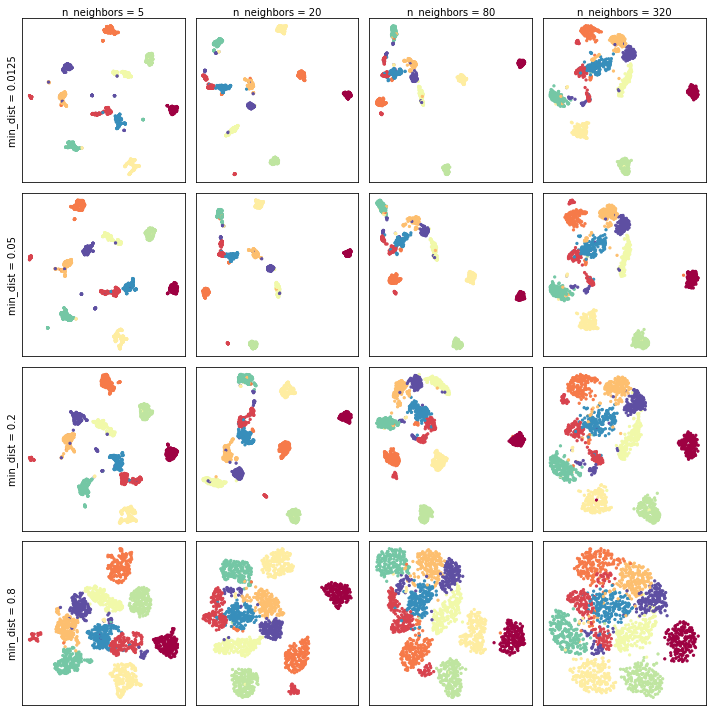

In [ ]:
# Figure 2, page 26:
fig, axs = plt.subplots(4, 4, figsize = (10, 10))
for i, dist in enumerate((0.0125, 0.05, 0.2, 0.8)):
    for j, nn in enumerate((5, 20, 80, 320)):
        progressBar(i * 4 + j, 16)
        fit = umap.UMAP(
            min_dist = dist,
            n_neighbors = nn,
            random_state = 42
        )
        embedding = fit.fit_transform(pendigits.data)
        # I have not yet checked the meaning 'cmap' and 's':
        axs[i, j].scatter(embedding[:,0], embedding[:,1], c = pendigits.target, cmap = 'Spectral', s = 5)
        axs[i, j].tick_params(bottom = False, left = False, labelleft = False, labelbottom = False)
        axs[i, j].xaxis.set_label_position('top')
        if not i:
            axs[i, j].set_xlabel(f"n_neighbors = {nn}")
        if not j:
            axs[i, j].set_ylabel(f"min_dist = {dist}")
fig.tight_layout()
fig.show()

In [ ]:
mnist = sklearn.datasets.fetch_openml('mnist_784')


Loop 16 of 16, elapsed time: 4310.2  ---------------------------------------------  



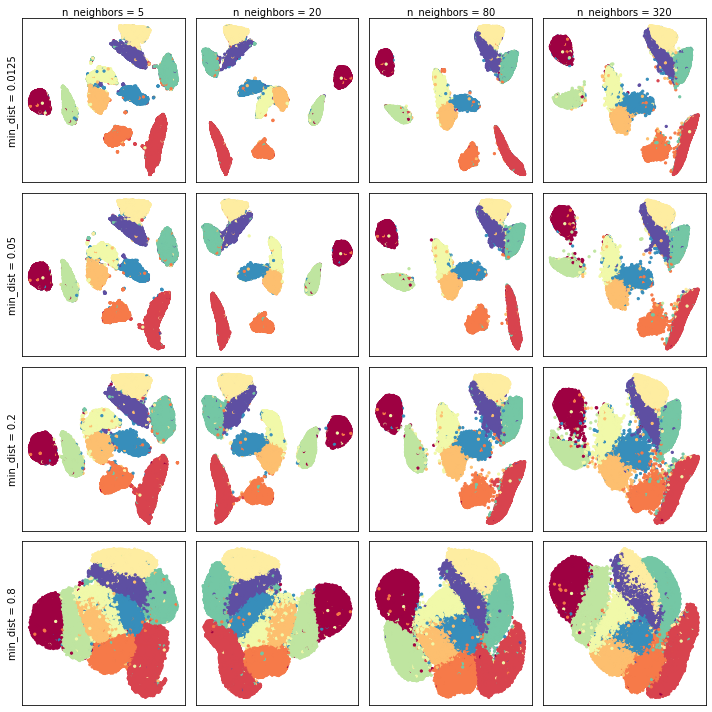

In [ ]:
# Figure 3, page 27. NB: This code is identical to tbe previous, except that
# we needed to fiddle with the pyplot `c` parameter. Perhaps setting 
# `as_frame = False` in `fetch_openml` would be another work-around.
#
# This takes 1.5 hours to run!  The first three images in the first column
# appear to be mirror images of the ones in the paper.  The colours are
# brighter, for whatever reason. 
fig, axs = plt.subplots(4, 4, figsize = (10, 10))
for i, dist in enumerate((0.0125, 0.05, 0.2, 0.8)):
    for j, nn in enumerate((5, 20, 80, 320)):
        progressBar(i * 4 + j, 16)
        fit = umap.UMAP(
            min_dist = dist,
            n_neighbors = nn,
            random_state = 42
        )
        embedding = fit.fit_transform(mnist.data)
        # I have not yet checked the meaning 'cmap' and 's':
        axs[i, j].scatter(embedding[:,0], embedding[:,1], c = [int(x) for x in mnist.target], cmap = 'Spectral', s = 5)
        axs[i, j].tick_params(bottom = False, left = False, labelleft = False, labelbottom = False)
        axs[i, j].xaxis.set_label_position('top')
        if not i:
            axs[i, j].set_xlabel(f"n_neighbors = {nn}")
        if not j:
            axs[i, j].set_ylabel(f"min_dist = {dist}")
fig.tight_layout()
fig.show()